<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h4 style="padding: 10px;
              color:white;">Project : Human Activity Recognition using Machine Learning

    
</h4>
</div>
    
</center>

## Dataset summary :
Link to the dataset : https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones
- Collected from 30 volunteers aged 19-48 wearing waist-mounted smartphones with accelerometer and gyroscope sensors.
- Activities were performed while data was recorded using these sensors.
- Data manually labeled, and experiment video recorded for accuracy.
- Contains 563 features, including subject and activity.
- Subject IDs range from 1 to 30.
- Captures '3-axial linear acceleration' (tAcc-XYZ) and '3-axial angular velocity' (tGyro-XYZ) signals from sensors.
- Preprocessed with noise filters.
- Sampled in 2.56-second windows with 50% overlap, each window contains 128 readings.

### Objectives :

<div class="alert alert-block alert-info">
  <ul style="list-style-type: disc;">
    <li> We aim to build a machine learning model to classify a person's actions from a series of measurements captured by sensors.</li>
    <li> 30 subjects (volunteers) data is randomly split into 70% (21) test and 30% (7) train data. Each datapoint corresponds to one of the 6 Activities. Given a new datapoint, we have to predict the Activity.</li>
    <li> This notebook focuses on data exploration, data analysis, and visualizing data. Finally, we save the cleaned data into a CSV to use for model fitting in the next notebook.</li>
  </ul>
</div>



### Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
# importing the libraries for plotting "separability of the classes".
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import get_cmap 
from matplotlib.colors import rgb2hex
import warnings
warnings.simplefilter("ignore")

Lets us start by seeing our data first.

### Load the preprocessed dataset

In [2]:
# load train dataset
df= pd.read_csv('train.csv')

Let's see the top rows of the training data to get an idea. 

In [3]:
df.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

Since our data is already split into train and test, let's have a glance at the test data too.

In [4]:
#test data
dft= pd.read_csv('test.csv')
dft

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415         -0.967458         -0.944958         -0.986799   
2            -0.993819         -0.969926         -0.962748         -0.994403   
3            -0.994743         -0.973268         -0.967091         -0.995274   
4            -0.993852         -0.967445         -0.978295         -0.994111   
...                ...               ...               ...               ...   
2942         -0.287866         -0.140589         -0.215088         -0.356083   
2943         -0.305388          0.028148         -0.196373         -0.373540   
2944         -0.329638         -0.042143         -0.250181         -0.388017   
2945         -0.323114         -0.229775         -0.207574         -0.392380   
2946         -0.330046         -0.195253         -0.164339         -0.430974   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.925249         -0.674302         -0.894088  ...   
1            -0.968401         -0.945823         -0.894088  ...   
2            -0.970735         -0.963483         -0.939260  ...   
3            -0.974471         -0.968897         -0.938610  ...   
4            -0.965953         -0.977346         -0.938610  ...   
...                ...               ...               ...  ...   
2942         -0.148775         -0.232057          0.185361  ...   
2943         -0.030036         -0.270237          0.185361  ...   
2944         -0.133257         -0.347029          0.007471  ...   
2945         -0.279610         -0.289477          0.007471  ...   
2946         -0.218295         -0.229933         -0.111527  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.705974                     0.006462   
1                           -0.594944                    -0.083495   
2                           -0.640736                    -0.034956   
3                           -0.736124                    -0.017067   
4                           -0.846595                    -0.002223   
...                               ...                          ...   
2942                        -0.750809                    -0.337422   
2943                        -0.700274                    -0.736701   
2944                        -0.467179                    -0.181560   
2945                        -0.617737                     0.444558   
2946                        -0.436940                     0.598808   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                 0.162920                         -0.825886   
1                                 0.017500                         -0.434375   
2                                 0.202302                          0.064103   
3                                 0.154438                          0.340134   
4                                -0.040046                          0.736715   
...                                    ...                               ...   
2942                              0.346295                

So we can see that the test data has 30% of the whole data i.e. 2947 rows.

**Adavantage of the pre-defined split** <br>
By keeping the test set completely separate during preprocessing, we are reducing the risk of data leakage. It also ensures an unbiased evaluation of your model's performance. 

## Explore data

Let's start our data analysis and pre-processing. 

### What are these features?

In [5]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

- So we have 563 features in our dataset including the subject column and the Activity column which we will use as target variable later. 

- The features seem to have a main name and some information on how they have been computed attached. Grouping the main names will reduce the dimensions for the first impression.

In [6]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

count
fBodyAcc                 79
fBodyGyro                79
fBodyAccJerk             79
tGravityAcc              40
tBodyAcc                 40
tBodyGyroJerk            40
tBodyGyro                40
tBodyAccJerk             40
tBodyAccMag              13
tGravityAccMag           13
tBodyAccJerkMag          13
tBodyGyroMag             13
tBodyGyroJerkMag         13
fBodyAccMag              13
fBodyBodyAccJerkMag      13
fBodyBodyGyroMag         13
fBodyBodyGyroJerkMag     13
angle                     7
subject                   1
Activity                  1

Mainly there are 'acceleration' and 'gyroscope' features along with some few 'gravity' features. <br>

Its impressive to see how many features there are in regard of the limited number of sensors used in the experiment. 

In [7]:
df.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

### Column Header

Columns are bit disfficult to read. Let's remove characters like '-' and '()' from column names for readability and ease of use in data analysis and modeling.

In [8]:
df.columns = df.columns.str.replace('-', '').str.replace(r'\(\)', '', regex=True)

In [9]:
# doing it for test dataset as well.
dft.columns = dft.columns.str.replace('-', '').str.replace(r'\(\)', '', regex=True)

Recheck the dataset to see the renamed columns.

In [10]:
df.head()

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0       0.288585      -0.020294      -0.132905     -0.995279     -0.983111   
1       0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
2       0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
3       0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
4       0.276629      -0.016570      -0.115362     -0.998139     -0.980817   

   tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  ...  \
0     -0.913526     -0.995112     -0.983185     -0.923527     -0.934724  ...   
1     -0.960322     -0.998807     -0.974914     -0.957686     -0.943068  ...   
2     -0.978944     -0.996520     -0.963668     -0.977469     -0.938692  ...   
3     -0.990675     -0.997099     -0.982750     -0.989302     -0.938692  ...   
4     -0.990482     -0.998321     -0.979672     -0.990441     -0.942469  ...   

   fBodyBodyGyroJerkMagkurtosis  angle(tBodyAccMean,gravity)  \
0                     -0.710304                    -0.112754   
1                     -0.861499                     0.053477   
2                     -0.760104                    -0.118559   
3                     -0.482845                    -0.036788   
4                     -0.699205                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  Activity  
0              0.179941             -0.058627        1  STANDING  
1              0.180289             -0.054317        1  STANDING  
2              0.180637             -0.049118        1  STANDING  
3              0.181935             -0.047663        1  STANDING  
4              0.185151             -0.043892        1  STANDING  

[5 rows x 563 columns]

 **Shape of dataset** <br> Knowing the number of observations and columns in the dataset.

In [11]:
# total rows and columns
df.shape

(7352, 563)

There are 7352 rows in our training data and 563 columns (features).

**Duplicate Check**

In [12]:
#Check for Duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7347    False
7348    False
7349    False
7350    False
7351    False
Length: 7352, dtype: bool

The data has no duplicates.

**Missing Values**

If there are any null values, we need to address it and perform imputation methoids to fill in the missing values.

In [13]:
#checking for missing values in the dataset df
df.isnull().sum()

tBodyAccmeanX           0
tBodyAccmeanY           0
tBodyAccmeanZ           0
tBodyAccstdX            0
tBodyAccstdY            0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

There are no null or missing values present in any of the columns or variables. 

**Data Types and objects**

We do this check because it's essential to understand the data types to apply appropriate data preprocessing and analysis techniques.

In [14]:
#checking for datatypes of each column
df.dtypes

tBodyAccmeanX           float64
tBodyAccmeanY           float64
tBodyAccmeanZ           float64
tBodyAccstdX            float64
tBodyAccstdY            float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

- The variety of data types in the dataset suggests that it contains a mix of numerical and categorical variables.
- Except from the label and the newly created 'Data' and 'subject' features there is only numerical data.

**Dataset statistics**

In [15]:
#to know the statistics of numeric columns
df.describe()

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  \
count    7352.000000    7352.000000    7352.000000   7352.000000   
mean        0.274488      -0.017695      -0.109141     -0.605438   
std         0.070261       0.040811       0.056635      0.448734   
min        -1.000000      -1.000000      -1.000000     -1.000000   
25%         0.262975      -0.024863      -0.120993     -0.992754   
50%         0.277193      -0.017219      -0.108676     -0.946196   
75%         0.288461      -0.010783      -0.097794     -0.242813   
max         1.000000       1.000000       1.000000      1.000000   

       tBodyAccstdY  tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  \
count   7352.000000   7352.000000   7352.000000   7352.000000   7352.000000   
mean      -0.510938     -0.604754     -0.630512     -0.526907     -0.606150   
std        0.502645      0.418687      0.424073      0.485942      0.414122   
min       -0.999873     -1.000000     -1.000000     -1.000000     -1.000000   
25%       -0.978129     -0.980233     -0.993591     -0.978162     -0.980251   
50%       -0.851897     -0.859365     -0.950709     -0.857328     -0.857143   
75%       -0.034231     -0.262415     -0.292680     -0.066701     -0.265671   
max        0.916238      1.000000      1.000000      0.967664      1.000000   

       tBodyAccmaxX  ...  fBodyBodyGyroJerkMagskewness  \
count   7352.000000  ...                   7352.000000   
mean      -0.468604  ...                     -0.307009   
std        0.544547  ...                      0.321011   
min       -1.000000  ...                     -0.995357   
25%       -0.936219  ...                     -0.542602   
50%       -0.881637  ...                     -0.343685   
75%       -0.017129  ...                     -0.126979   
max        1.000000  ...                      0.989538   

       fBodyBodyGyroJerkMagkurtosis  angle(tBodyAccMean,gravity)  \
count                   7352.000000                  7352.000000   
mean                      -0.625294                     0.008684   
std                        0.307584                     0.336787   
min                       -0.999765                    -0.976580   
25%                       -0.845573                    -0.121527   
50%                       -0.711692                     0.009509   
75%                       -0.503878                     0.150865   
max                        0.956845                     1.000000   

       angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
count                           7352.000000                       7352.000000   
mean                               0.002186                          0.008726   
std                                0.448306                          0.608303   
min                               -1.000000                         -1.000000   
25%                               -0.289549                         -0.482273   
50%                                0.008943                          0.008735   
75%                                0.292861                          0.506187   
max                                1.000000                          0.998702   

       angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
count                           7352.000000           7352.000000   
mean                              -0.005981             -0.489547   
std                                0.477975              0.511807   
min                               -1.000000             -1.000000   
25%                               -0.376341             -0.812065   
50%                               -0.000368             -0.709417   
75%                                0.359368             -0.509079   
max                                0.996078              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)      subject  
count           7352.000000           7352.000000  7352.000000  
mean               0.058593             -0.056515    17.413085  

- For the body acceleration features, they exhibit a wide range of values, with a minimum of -1 and a maximum of 1 in some columns. 
- The mean values for these features range from approximately -0.61 to 0.27, with standard deviations between approximately 0.04 and 0.45.

### Class Distribution

In [16]:
df['Activity'].unique() 
# its categorical , will encode it as [1,6] during pipeline pre processing

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

So there are 6 categories for Activity. Let's see how are these Labels Seperated.

### Visualize the class Distribution

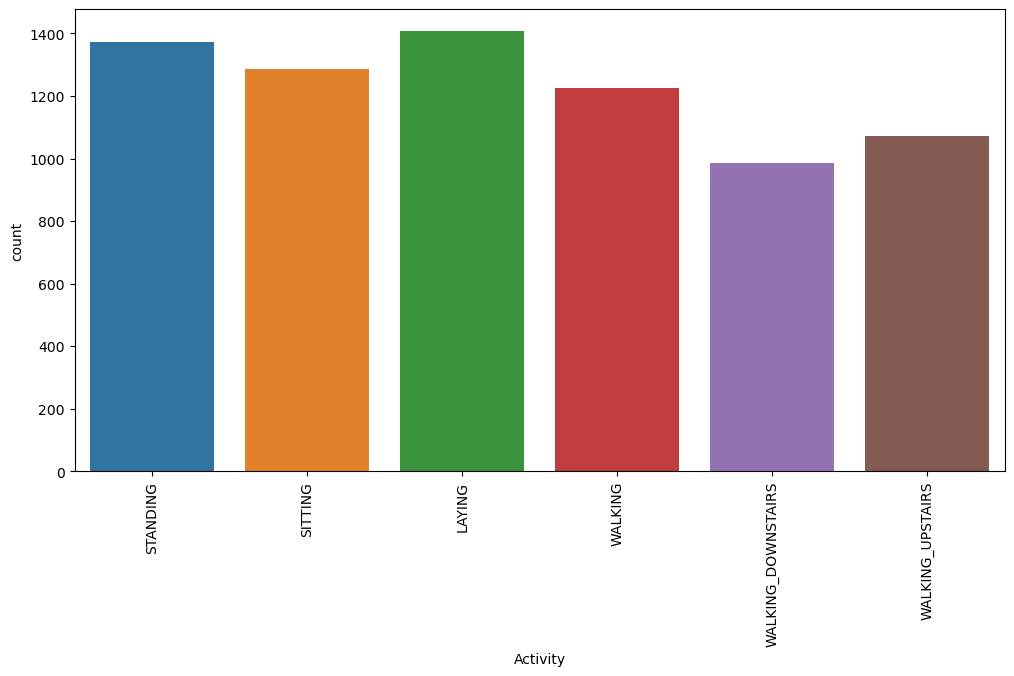

In [17]:
plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=df)
plt.xticks(x=df['Activity'],rotation='vertical')
plt.show()

Looks like the data is almost balanaced in all of the 6 categories.

In [18]:
# checking unique subjects (users) in training data
df['subject'].unique()


array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

So we have data for every subject for 30 subjects.

### Check for data imbalance

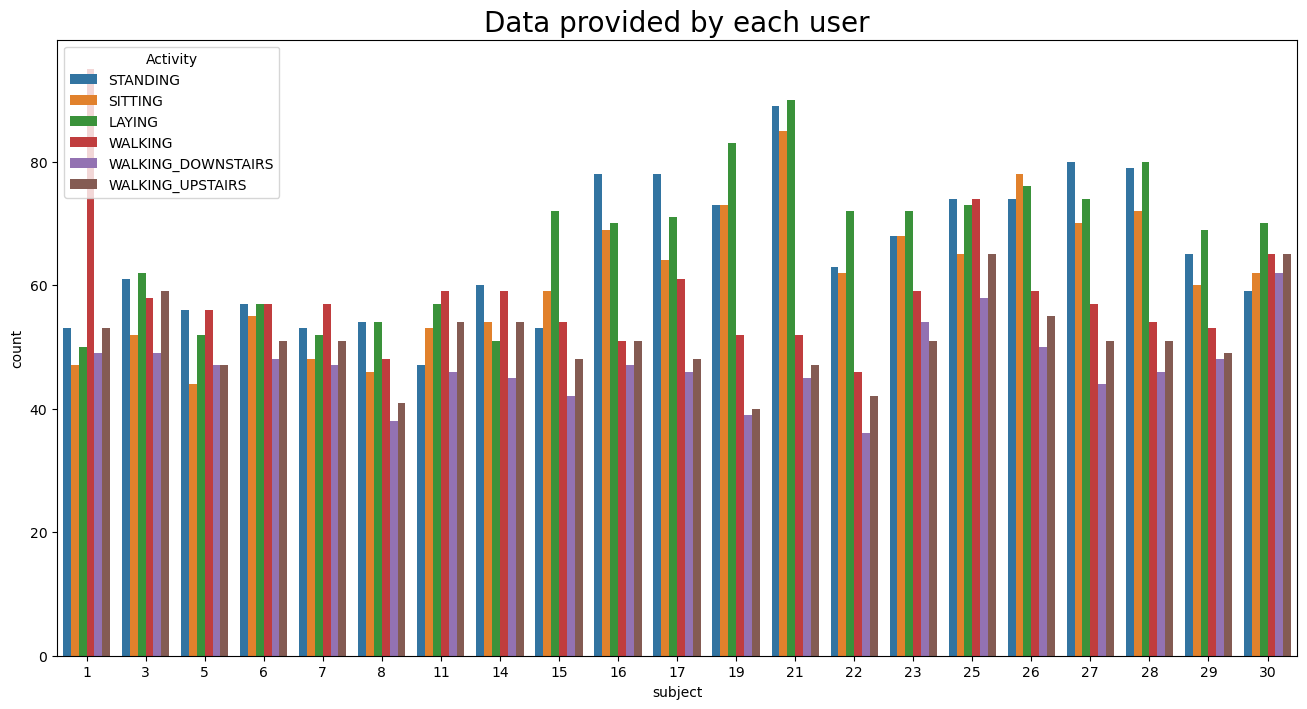

In [19]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()


We possess data for all subjects across all six distinct activity categories, including standing, walking, and others.

**We have done the overview of the dataset now. Let's do more deep analysis of the dataset.** 

## Static and Dynamic Activities

- In static activities (sit, stand, lie down) motion information will not be very useful.
- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

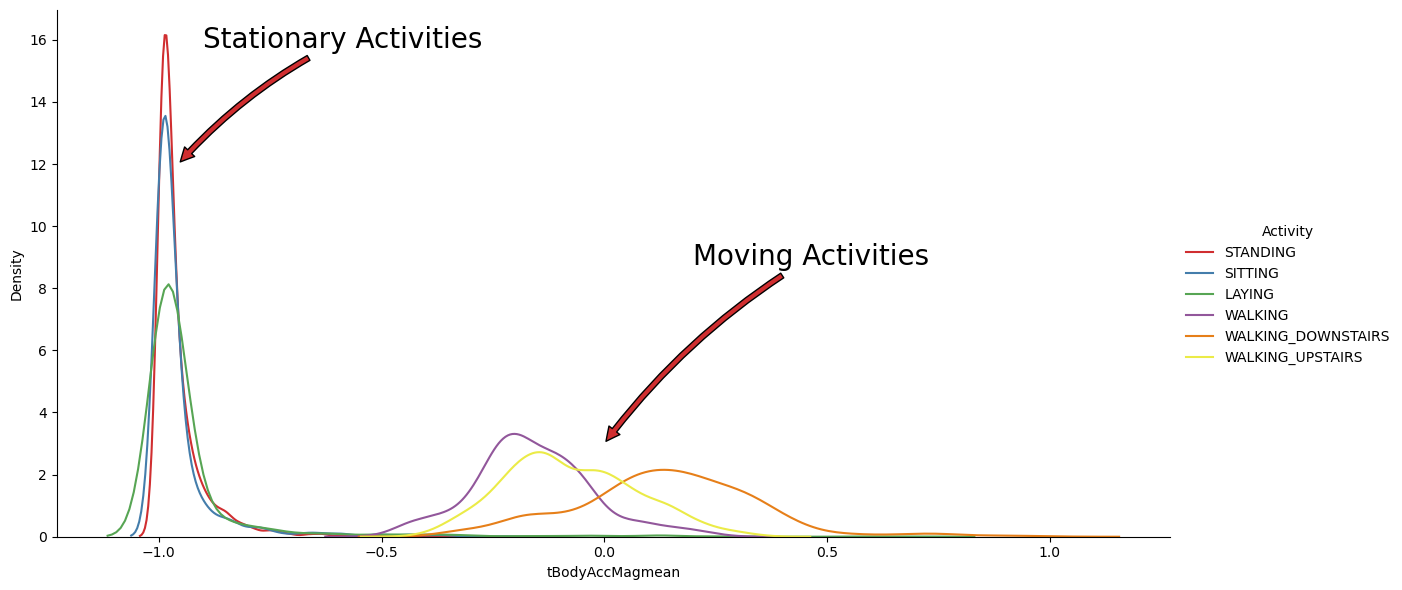

In [20]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df, hue='Activity', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,12), xytext=(-0.9, 16), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

**Analysis** <br>
- As we can clearly see the difference between stationary activities and Moving Activities

- "tBodyAccMag-mean" essentially represents the average magnitude of body acceleration over a certain time window or interval. It captures the intensity or strength of the body's movement during a particular activity.

### Magnitude of an acceleration - how well does it seperate labels

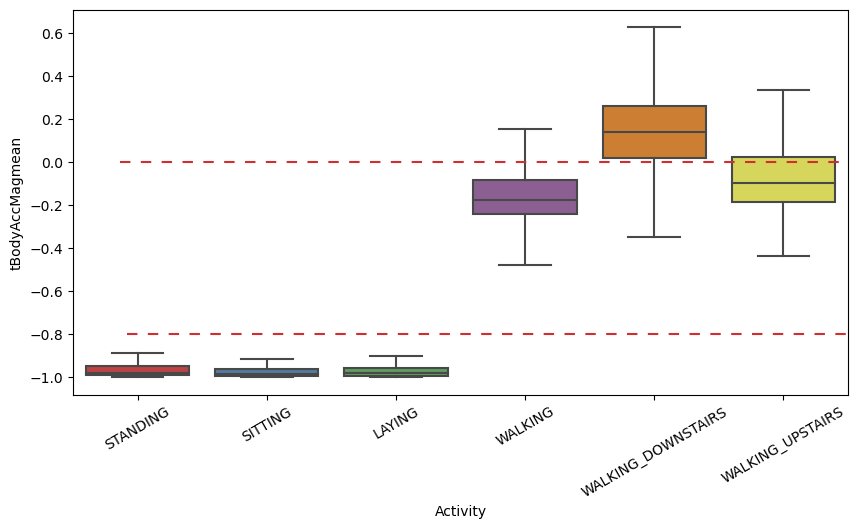

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Activity' , y = 'tBodyAccMagmean' , data = df , showfliers=False)
plt.xticks(rotation = 30)
plt.axhline(y=-.8, xmin=0.07 , dashes = (5,5))
plt.axhline(y=0, xmin=0.06 ,  dashes = (5,5))

plt.show()

- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

#### Position of GravityAccelerationComponents also matters

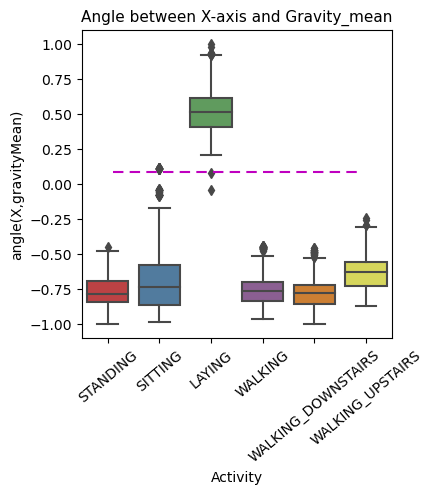

In [22]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=df)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=11)
plt.xticks(rotation = 40)
plt.show()

**Analysis:** 

If angleX,gravityMean > 0 then Activity is Laying.

## Separability of the classes
The dataset is geared towards classifying the activity of the participant. Let us investigate the separability of the classes.

Now we will see how much the activities are seperable and also we will see how each participant has distinct style which can influence the prediction (target).

In [23]:
df_copy = df.copy()

In [24]:
# creating label dataframe to get only Activity column. 
label = df_copy.pop('Activity')
label_counts = label.value_counts()
df_copy

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.288585      -0.020294      -0.132905     -0.995279     -0.983111   
1          0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
2          0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
3          0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
4          0.276629      -0.016570      -0.115362     -0.998139     -0.980817   
...             ...            ...            ...           ...           ...   
7347       0.299665      -0.057193      -0.181233     -0.195387      0.039905   
7348       0.273853      -0.007749      -0.147468     -0.235309      0.004816   
7349       0.273387      -0.017011      -0.045022     -0.218218     -0.103822   
7350       0.289654      -0.018843      -0.158281     -0.219139     -0.111412   
7351       0.351503      -0.012423      -0.203867     -0.269270     -0.087212   

      tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  \
0        -0.913526     -0.995112     -0.983185     -0.923527     -0.934724   
1        -0.960322     -0.998807     -0.974914     -0.957686     -0.943068   
2        -0.978944     -0.996520     -0.963668     -0.977469     -0.938692   
3        -0.990675     -0.997099     -0.982750     -0.989302     -0.938692   
4        -0.990482     -0.998321     -0.979672     -0.990441     -0.942469   
...            ...           ...           ...           ...           ...   
7347      0.077078     -0.282301      0.043616      0.060410      0.210795   
7348      0.059280     -0.322552     -0.029456      0.080585      0.117440   
7349      0.274533     -0.304515     -0.098913      0.332584      0.043999   
7350      0.268893     -0.310487     -0.068200      0.319473      0.101702   
7351      0.177404     -0.377404     -0.038678      0.229430      0.269013   

      ...  fBodyBodyGyroJerkMagskewness  fBodyBodyGyroJerkMagkurtosis  \
0     ...                     -0.298676                     -0.710304   
1     ...                     -0.595051                     -0.861499   
2     ...                     -0.390748                     -0.760104   
3     ...                     -0.117290                     -0.482845   
4     ...                     -0.351471                     -0.699205   
...   ...                           ...                           ...   
7347  ...                     -0.588433                     -0.880324   
7348  ...                     -0.390738                     -0.680744   
7349  ...                      0.025145                     -0.304029   
7350  ...                      0.063907                     -0.344314   
7351  ...                     -0.387052                     -0.740738   

      angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                       -0.112754                              0.030400   
1                        0.053477                             -0.007435   
2                       -0.118559                              0.177899   
3                       -0.036788                             -0.012892   
4                        0.123320                              0.122542   
...                           ...                                   ...   
7347                    -0.190437                              0.829718   
7348                     0.064907                              0.875679   
7349                     0.052806                             -0.266724   
7350                    -0.101360                              0.700740   
7351                    -0.280088                             -0.007739   

      angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                            -0.464761                             -0.018446   
1                            -0.732626                              0.703511   
2                             0.100699                              0.808529  

In [25]:
# checking label. 
label

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

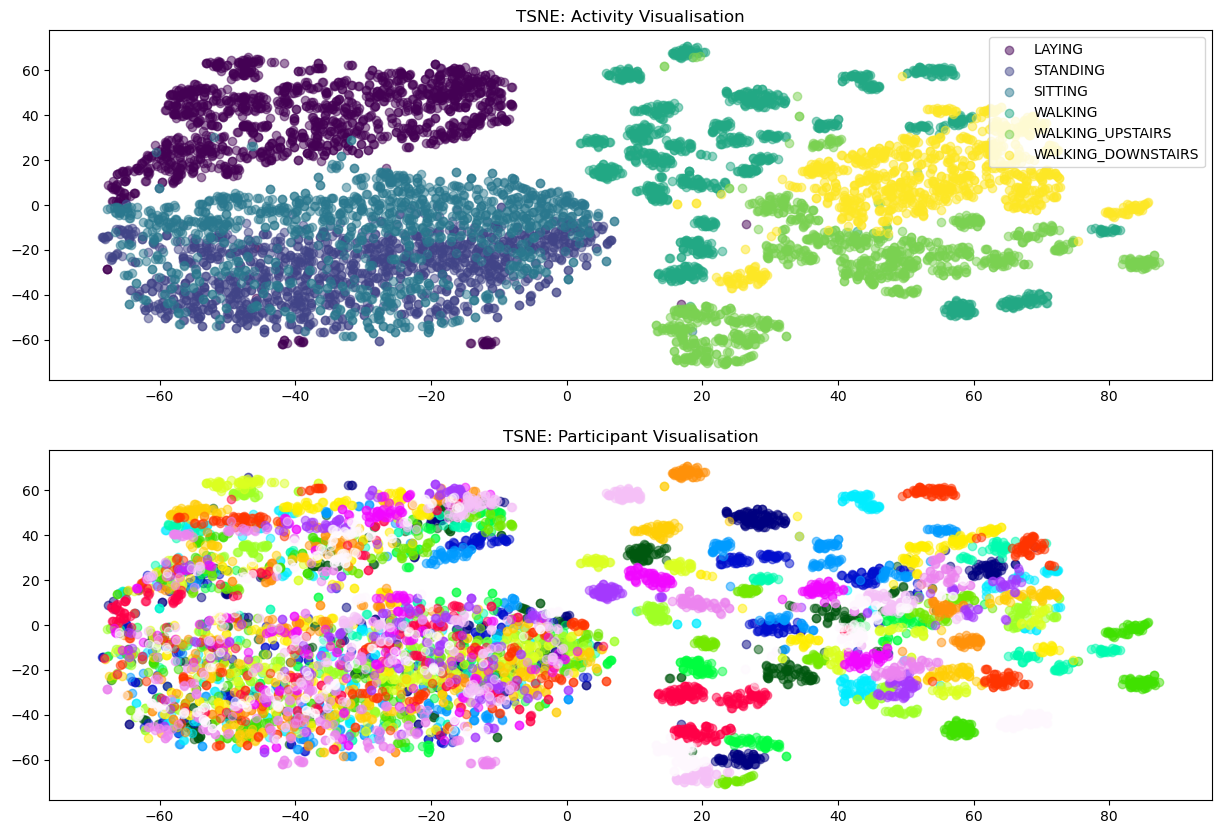

In [26]:
#created copy of original train data df for this plot
tsne_data = df_copy
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# PCA to reduce dimesnions - used it only for plotting
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))

### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('TSNE: Participant Visualisation')
plt.show()

In plot 1 you can clearly see the **activities are mostly separable.**

Plot 2 reveals personal information of the participants. **Everybody has for example an unique/sparable walking style** (on the upper right). Therefore the smartphone should be able to detect what you are doing and also who is using the smartphone (if you are moving around with it).

## Unique walking styles for each subject

In [27]:
# creating dataframe by combining test & train dataframe for plotting the walking patterns.
df_copy = pd.concat([df, dft])

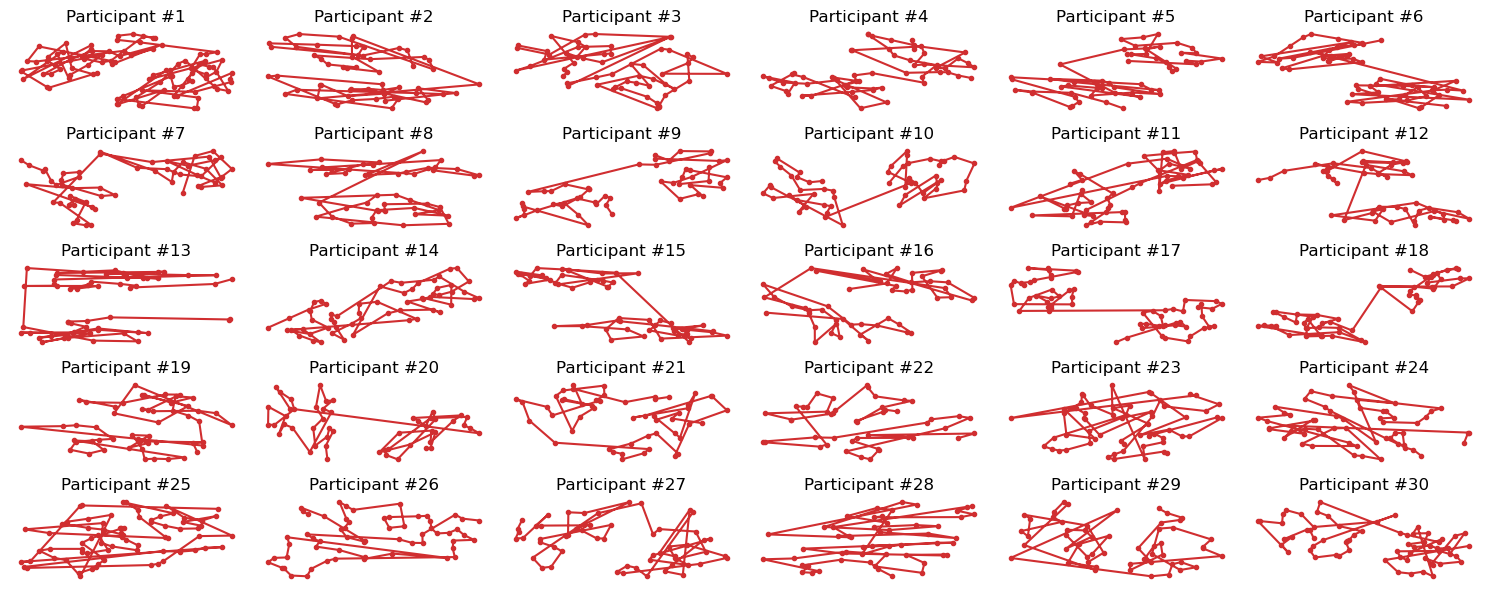

In [28]:
#created copy of original train data df for this plot
fig, axarr = plt.subplots(5, 6, figsize=(15,6))
#all_subject = pd.unique(df_copy['subject'])
#df_copy = df + dft
for person in range(0, 30):
    # Get data
    single_person = df_copy[(df_copy['Activity']=='WALKING') & (df_copy['subject']==person+1)]
    single_person = single_person.drop('Activity', axis=1)
    # Scale data
    scl = StandardScaler()
    tsne_data = scl.fit_transform(single_person)
    # Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    tsne_data = pca.fit_transform(tsne_data)
    # Transform data
    tsne = TSNE(random_state=3)
    tsne_transformed = tsne.fit_transform(tsne_data)
    
    # Create plot
    axarr[person//6][person%6].plot(tsne_transformed[:,0], tsne_transformed[:,1], '.-')
    axarr[person//6][person%6].set_title('Participant #{}'.format(person+1))
    axarr[person//6][person%6].axis('off')
    
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
  <ul style="list-style-type: disc;">
    Visualizing the subjects' walking patterns in relation to sensor data, it becomes evident that each subject exhibits a unique and somewhat random walking pattern. However, there are instances of outliers or noise, like participant #3, whose walking pattern appears to be a linear line – a scenario that is not practically feasible.
  </ul>
</div>

## Correlation Matrix

#### Since we have more than 500 columns, we can take mean value column of each unique sensor information in all axis, X, Y, Z. 

In [29]:
df_c = pd.DataFrame()
columns_to_copy = ['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tGravityAccmeanX',
                  'tGravityAccmeanY', 'tGravityAccmeanZ', 'tBodyAccJerkmeanX', 'tBodyAccJerkmeanY', 'tBodyAccJerkmeanZ',
                  'tBodyGyromeanX', 'tBodyGyromeanY', 'tBodyGyromeanZ',
                  'tBodyGyroJerkmeanX', 'tBodyGyroJerkmeanY', 'tBodyGyroJerkmeanZ',
                  'tBodyAccMagmean', 'tGravityAccMagmean', 'tBodyAccJerkMagmean', 'tBodyGyroMagmean', 'tBodyGyroJerkMagmean',
                  'fBodyAccmeanX', 'fBodyAccmeanY', 'fBodyAccmeanZ',
                  'fBodyAccJerkmeanX', 'fBodyAccJerkmeanY', 'fBodyAccJerkmeanZ',
                  'fBodyGyromeanX', 'fBodyGyromeanY', 'fBodyGyromeanZ', 'Activity']

# Copy the selected columns from df to df_c
df_c[columns_to_copy] = df[columns_to_copy]
# Label encoding for target variable for calculating correlation matrix and plotting it
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_c['Activity'] = label_encoder.fit_transform(df_c['Activity'])

In [30]:
#calculating the correlation Matrix
correlation_matrix = df_c.corr()

In [31]:
import plotly.graph_objs as go
import pandas as pd
# Create a figure
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',
))

fig.update_layout(
    title='Interactive Correlation Matrix',
    xaxis_title='Features',
    yaxis_title='Features',
)

# Show the interactive plot
fig.show()

**Analysis:** <br>
- We built the correlation matrix for all 561 variables.  We see that most of these features are highly correlated with target variable. 
- We can also try to reduce the dimension using known techniques to avoid multi collinearity but this reduction often results in some loss of information. We might lose important data as well in this case. So we won't do that step in our pre processing. 

## Cleaned data 

Lets save the pre-processed dataframe to csv to perform modelling task on it.

In [32]:
# cleaned train data set into csv . 
df.to_csv('cleaned_train.csv', index=False)
dft.to_csv('cleaned_test.csv', index=False)

We will use this csv as our data for model fitting and evaluation in the next notebook.